<a href="https://colab.research.google.com/github/chetansgode/Health_Insurance_Cross_Sales_Prediction_classification/blob/main/Health_Insurance_Cross_Sales_Prediction_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Health Insurance Cross Sales Prediction



##### **Project Type**    - EDA/Classification
##### **Contribution**    - Individual



# **Project Summary -**

  *      Insurance  company has provided Health insurance to its customers and Now They want to expand their bussiness in Vahicle insurance So they want model to predict wheather the customers or Health insurance policy Holder will be intersted in Vahicle insurance or not.
  *      Just like Medical Insurance, there is Vehicle Insurance where every year customers needs to pay certain amount of premium to insurance provider company so that in case of unfortunate accident by vehicle,then insurance company will provide a compensation  to the customers.


# **GitHub Link -**

https://github.com/chetansgode/Health_Insurance_Cross_Sales_Prediction_classification.git

# **Problem Statement**


**Insurance Company want to expand their bussiness in Vahicle insurance So they want model to predict wheather the customers or Health insurance policy Holder will be intersted in Vahicle insurance or not.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# import library
import numpy as np
import pandas as pd
# for visualisation
import matplotlib.pyplot as plt
%matplotlib inline
%lsmagic
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# for ml module creation


### Dataset Loading

In [2]:
# Load Dataset
df=pd.read_csv('/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [3]:
# Dataset First Look

df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count

df.shape
print('dataset has no of row - ',df.shape[0])
print('dataset has no of column - ',df.shape[1])

dataset has no of row -  381109
dataset has no of column -  12


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print('Dataset has no of Duplicate values - ',df.duplicated().sum())

Dataset has no of Duplicate values -  0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
missing_values= df.isna().sum().sum()
print(f"Dataset has no of Null values -{missing_values}" )

Dataset has no of Null values -0


In [8]:
# Visualizing the missing values

#### Feature Engineering

In [9]:
# Need to convert categorical value into numerical format

#1--Replace Gender type male by 1 and female by 0 (categorical feature)

df['Gender']=np.where(df['Gender']=='Male',1,0)


#2--Replace Vehicle_Age(< 1 Year by 0, 1-2 Year by 1 ,> 2 Years  by 2)

df['Vehicle_Age']=df['Vehicle_Age'].apply(lambda x : 0 if x=='< 1 Year' else (1 if x== '1-2 Year' else 2))

#3--Replace Vehicle_Damage (Yes by 1 & No by 0)

df['Vehicle_Damage']=df['Vehicle_Damage'].apply(lambda x : 1 if x=='Yes' else 0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int64  
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 34.9 MB


### What did you know about your dataset?

* Dataset has 12 features and 381109 records.
* There are 8 categorical feature outof 12.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
print(df.columns)

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


In [12]:
# Dataset Describe
df.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,0.540761,38.822584,0.997869,26.388807,0.458210,0.609616,0.504877,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,0.498336,15.511611,0.046110,13.229888,0.498251,0.567439,0.499977,17213.155057,54.203995,83.671304,0.327936
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,1.000000,36.000000,1.000000,28.000000,0.000000,1.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

* Describing each Features
 * 'id'-Unique id for customers
 * 'Gender'- male or female (1 for male and 0 for famale) (Categorical)
 * 'Driving_License'- Customers has driving licence or not(1 for yes and 0 for no)(categorical)
 * 'Region_Code'-unique code for region of customers (categorical)
 * 'Previously_Insured'-Already has insurance or not(1 for yes and 0 for no) (categorical)

 * 'Vehicle_Age'-Age of vehicle Replace Vehicle_Age(< 1 Year by 0, 1-2 Year by 1 ,> 2 Years  by 2) (categorical)
 * 'Vehicle_Damage'-damage or not (yes by 1 and no by 0) (categorical)
 * 'Annual_Premium'-The amount need to pay as premium (Numerical)
 * 'Policy_Sales_Channel'-To reach customer process types (categorical)
 * 'Vintage'-no of day customers associated with company (numerical)
 * 'Response'- customer interested or not (yes by 1 and no by 0)

### Check Unique Values for each variable.

feature :- Gender
No of unique value :- 2
No of value count :-
 1    206089
0    175020
Name: Gender, dtype: int64


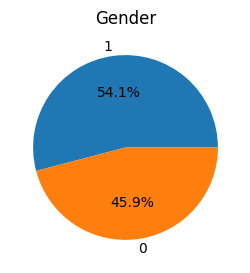

--------------------------------------------------------------------------------
feature :- Age
No of unique value :- 66
No of value count :-
 24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64


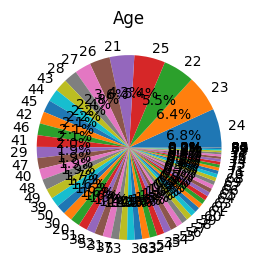

--------------------------------------------------------------------------------
feature :- Driving_License
No of unique value :- 2
No of value count :-
 1    380297
0       812
Name: Driving_License, dtype: int64


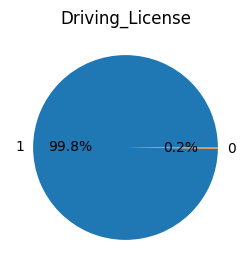

--------------------------------------------------------------------------------
feature :- Region_Code
No of unique value :- 53
No of value count :-
 28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64


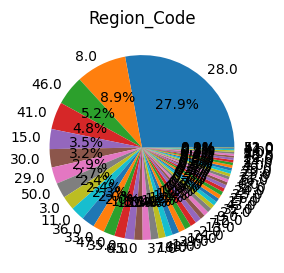

--------------------------------------------------------------------------------
feature :- Previously_Insured
No of unique value :- 2
No of value count :-
 0    206481
1    174628
Name: Previously_Insured, dtype: int64


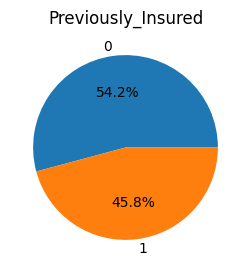

--------------------------------------------------------------------------------
feature :- Vehicle_Age
No of unique value :- 3
No of value count :-
 1    200316
0    164786
2     16007
Name: Vehicle_Age, dtype: int64


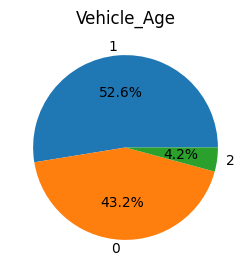

--------------------------------------------------------------------------------
feature :- Vehicle_Damage
No of unique value :- 2
No of value count :-
 1    192413
0    188696
Name: Vehicle_Damage, dtype: int64


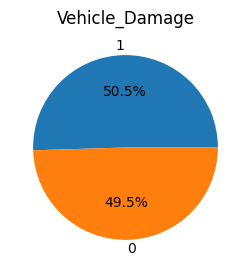

--------------------------------------------------------------------------------
feature :- Policy_Sales_Channel
No of unique value :- 155
No of value count :-
 152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64


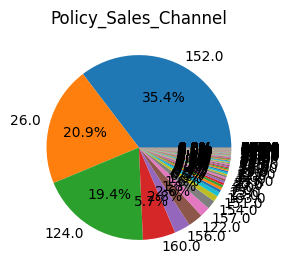

--------------------------------------------------------------------------------
feature :- Vintage
No of unique value :- 290
No of value count :-
 256    1418
73     1410
282    1397
158    1394
187    1392
       ... 
205    1235
89     1234
32     1230
224    1227
277    1226
Name: Vintage, Length: 290, dtype: int64


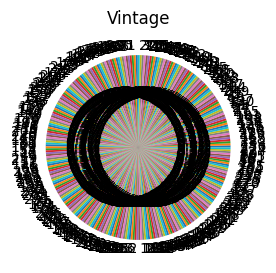

--------------------------------------------------------------------------------
feature :- Response
No of unique value :- 2
No of value count :-
 0    334399
1     46710
Name: Response, dtype: int64


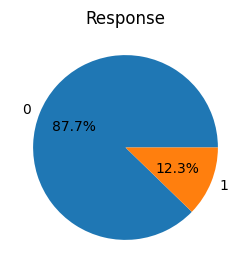

--------------------------------------------------------------------------------


In [13]:
# Check Unique Values for each variable.


for i in df.columns:
  if i not in ['id','Annual_Premium']:
    print( 'feature :-', i )
    print('No of unique value :-',df[i].nunique())
    print('No of value count :-\n',df[i].value_counts())
    labels=df[i].value_counts().index

    #visualize above data
    plt.figure(figsize=(3,3))
    plt.pie(df[i].value_counts(),labels=labels, autopct='%1.1f%%')
    plt.title(i)
    plt.show()
    print('--'*40)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Age vs Response from Customers

In [15]:
# Chart - 1 Numerical Data-Age vs Response from Customers

# Top 20 Age of Customers that Response Positively.
most_responding=df.groupby('Age')['Response'].value_counts().unstack().sort_values(by=df['Response'][2],ascending=False)[:20]
most_responding.rename(columns={0:'No',1:'Yes'},inplace=True)
print(most_responding)
print('--'*20)

# Top 20 Age of Customers that Response Negatively.
most_not_responding=df.groupby('Age')['Response'].value_counts().unstack().sort_values(by=df['Response'][1],ascending=False)[:20]
most_not_responding.rename(columns={0:'No',1:'Yes'},inplace=True)
print(most_not_responding)


Response      No     Yes
Age                     
44        6546.0  1811.0
43        6632.0  1805.0
45        6408.0  1775.0
46        6172.0  1707.0
42        6356.0  1651.0
41        6121.0  1615.0
47        5744.0  1607.0
40        5618.0  1550.0
48        5613.0  1500.0
39        5085.0  1375.0
38        4405.0  1305.0
49        5317.0  1298.0
50        5007.0  1256.0
37        4255.0  1153.0
36        3914.0  1152.0
51        4796.0  1119.0
35        3824.0  1112.0
33        3925.0  1085.0
34        3818.0  1077.0
52        4550.0  1040.0
----------------------------------------
Response       No     Yes
Age                      
24        25047.0   913.0
23        23364.0   892.0
22        20201.0   763.0
25        19902.0   734.0
21        15883.0   574.0
26        13051.0   484.0
27        10289.0   471.0
28         8357.0   617.0
29         6674.0   755.0
43         6632.0  1805.0
44         6546.0  1811.0
45         6408.0  1775.0
42         6356.0  1651.0
46         6172.0  

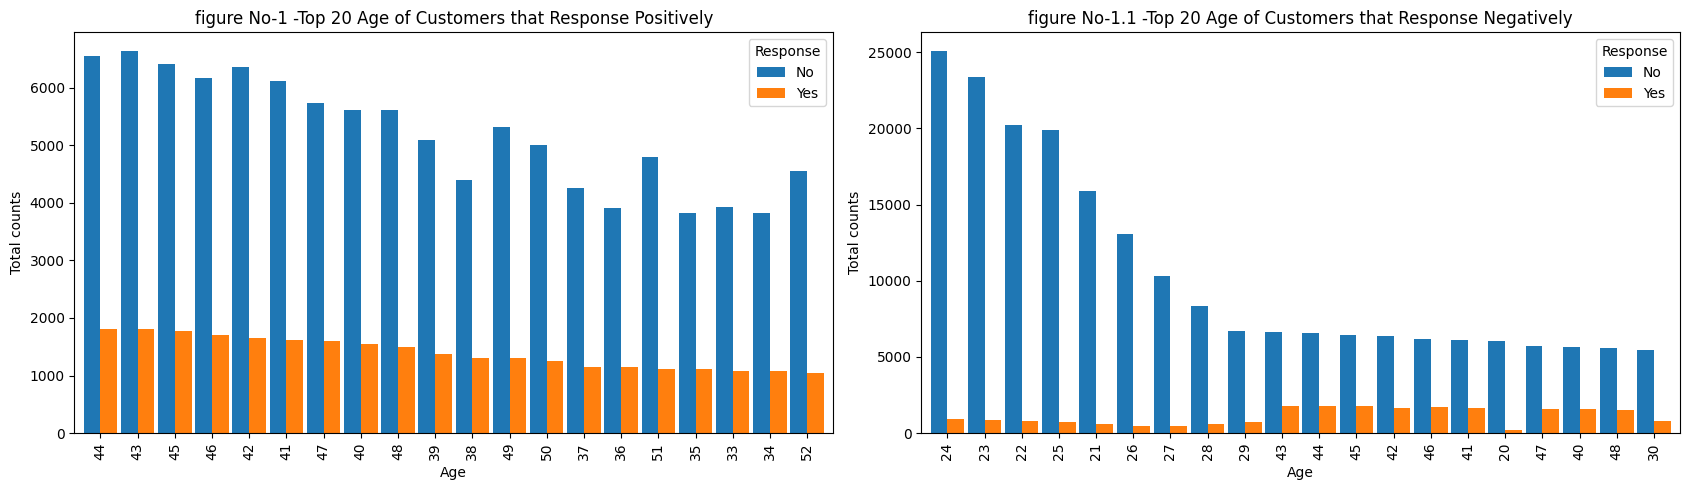

In [16]:
# Chart - 1 visualization code-Age vs Response from Customers

fig, axs = plt.subplots(1,2,figsize=(17,5))
#Top 20 Age of Customers that Response Positively.
most_responding.plot(kind='bar',width=0.9, ax=axs[0])
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Total counts')
axs[0].set_title('figure No-1 -Top 20 Age of Customers that Response Positively')


# Top 20 Age of Customers that Response Negatively.
most_not_responding.plot(kind='bar',width=0.9, ax=axs[1])
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Total counts')
axs[1].set_title('figure No-1.1 -Top 20 Age of Customers that Response Negatively')

plt.tight_layout()  # Optional, to improve spacing between subplots
plt.show()

##### 1. Why did you pick the specific chart?

* It is showing easily each data to present anythings.

##### 2. What is/are the insight(s) found from the chart?

* Most responsive customer has age 44 and above above 33 age
* Most Not responding customers has age 24
* The Percent of customers responding positively is very less as compare to health insurance

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* There is lots of customers who has taken Health insurance but not Taking vehicle insurance So need to do advertisement and explain customers how it is different than other.

#### Chart - 2-Gender Wise Customers Response

In [17]:
# Chart - 2 Numerical data-Gender Wise Customers Response

# Gender wise customers response
a=df.groupby('Gender')['Response'].value_counts().unstack()
a.rename(columns={0:'No',1:'Yes'},index={0:'Female',1:'Male'},inplace=True)
print(a)


Response      No    Yes
Gender                 
Female    156835  18185
Male      177564  28525


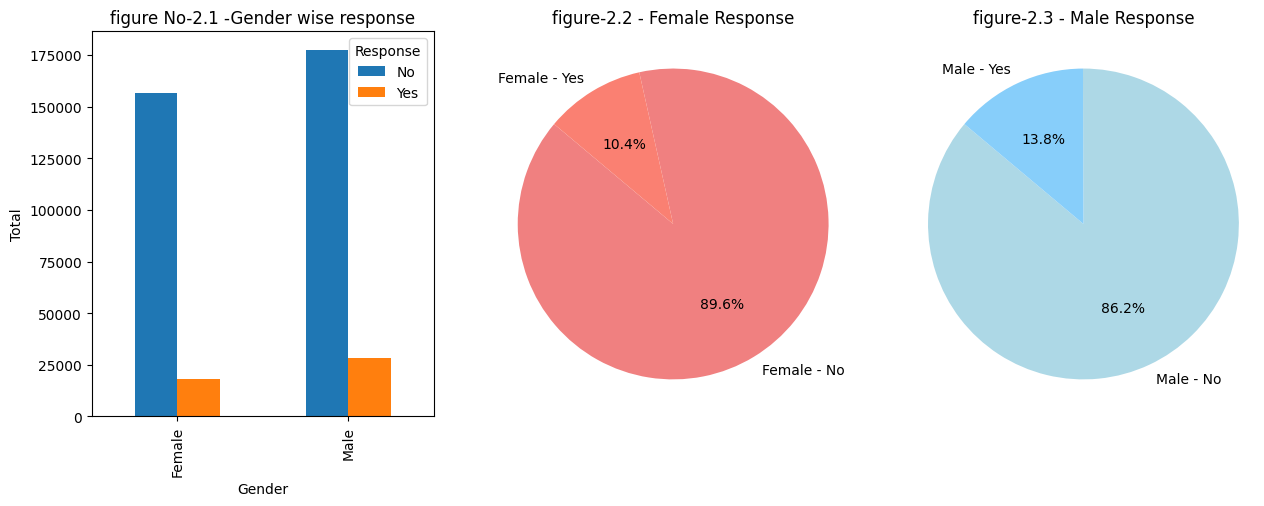

In [18]:

# Chart - 2 visualization code-Gender Wise Customers Response

fig,axs=plt.subplots(1,3,figsize=(15,5))
a.plot(kind='bar',ax=axs[0])
axs[0].set_title('figure No-2.1 -Gender wise response')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Total')


# Data for pie chart plot to see in percent.
gender_counts_female = [156835, 18185]
categories_female = ['Female - No', 'Female - Yes']
gender_counts_male = [177564, 28525]
categories_male = ['Male - No', 'Male - Yes']

# Plotting the pie chart

axs[1].pie(gender_counts_female, labels=categories_female, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'salmon', ])

axs[1].axis('equal')
axs[1].set_title('figure-2.2 - Female Response')

axs[2].pie(gender_counts_male, labels=categories_male, autopct='%1.1f%%', startangle=140, colors=[ 'lightblue', 'lightskyblue'])
axs[2].set_title('figure-2.3 - Male Response')
axs[2].axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

* To compare to active consumers and their response for new service.

##### 2. What is/are the insight(s) found from the chart?

* From above figure it's easy showing that Male are Responding Good as compare to Female.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Its chance to increase Vehicle insurance in future.
* Here is only 10.4% Female and 13.8% male are responding us so need to contact with other.

#### Chart - 3-Driving_License vs Response

In [19]:
# Chart - 3 Numerical code-Driving_License vs Response

# Driving_License wise customers response
a=df.groupby('Driving_License')['Response'].value_counts().unstack()
a.rename(columns={0:'No',1:'Yes'},index={0:'Not_Available',1:'Available'},inplace=True)
print(a)


Response             No    Yes
Driving_License               
Not_Available       771     41
Available        333628  46669


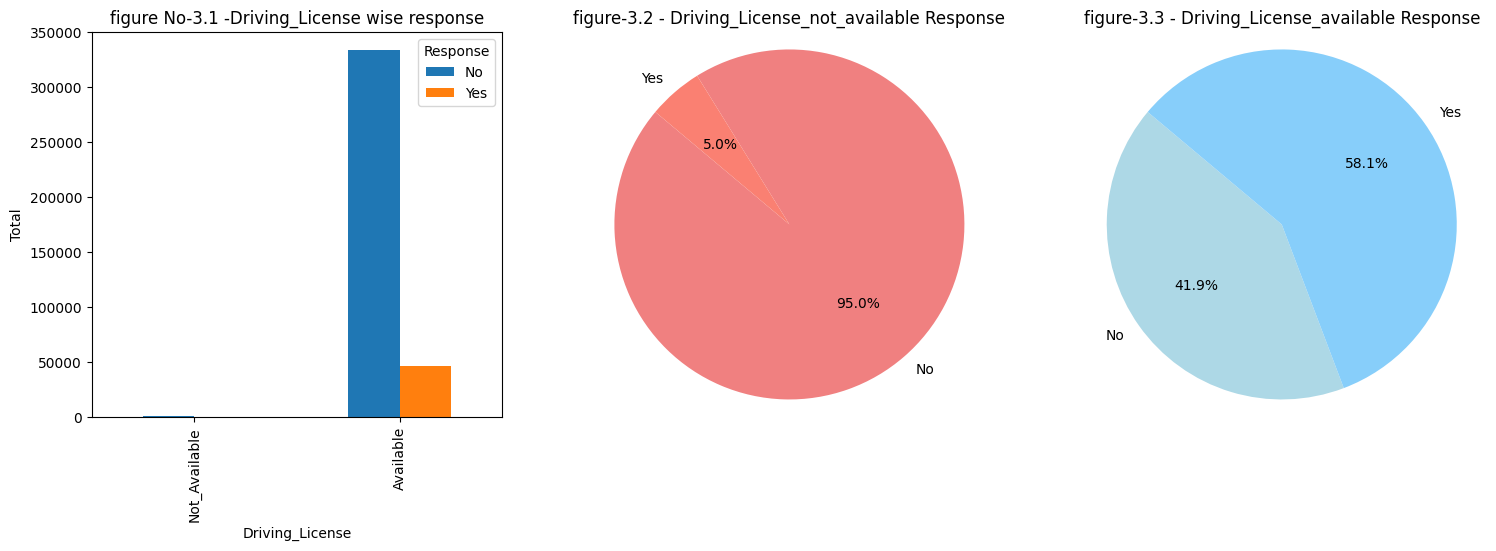

In [20]:
# Chart - 3 visualization -Driving_License vs Response

fig,axs=plt.subplots(1,3,figsize=(18,5))
a.plot(kind='bar',ax=axs[0])
axs[0].set_title('figure No-3.1 -Driving_License wise response')
axs[0].set_xlabel('Driving_License')
axs[0].set_ylabel('Total')


# Data for pie chart plot to see in percent.
Driving_License_not_available = [771,41]
categories_female = ['No', 'Yes']
Driving_License_available = [33628 , 46669]
categories_male = ['No', 'Yes']

# Plotting the pie chart

axs[1].pie(Driving_License_not_available, labels=categories_female, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'salmon', ])

axs[1].axis('equal')
axs[1].set_title('figure-3.2 - Driving_License_not_available Response')

axs[2].pie(Driving_License_available, labels=categories_male, autopct='%1.1f%%', startangle=140, colors=[ 'lightblue', 'lightskyblue'])
axs[2].set_title('figure-3.3 - Driving_License_available Response')
axs[2].axis('equal')
plt.show()


##### 1. Why did you pick the specific chart?

* To compare easily.

##### 2. What is/are the insight(s) found from the chart?

* Driving license not availble has very low response as compare to available.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* We have to Focus on driving licence available customers.

#### Chart - 4- Previously_Insured vs Response

In [21]:
# Chart - 4 - Numerical Data - Previously_Insured vs Response

# Previously_Insured wise customers response
a=df.groupby('Previously_Insured')['Response'].value_counts().unstack()
a.rename(columns={0:'No',1:'Yes'},index={0:'Not_Previously_Insured',1:'Previously_Insured'},inplace=True)
print(a)



Response                    No    Yes
Previously_Insured                   
Not_Previously_Insured  159929  46552
Previously_Insured      174470    158


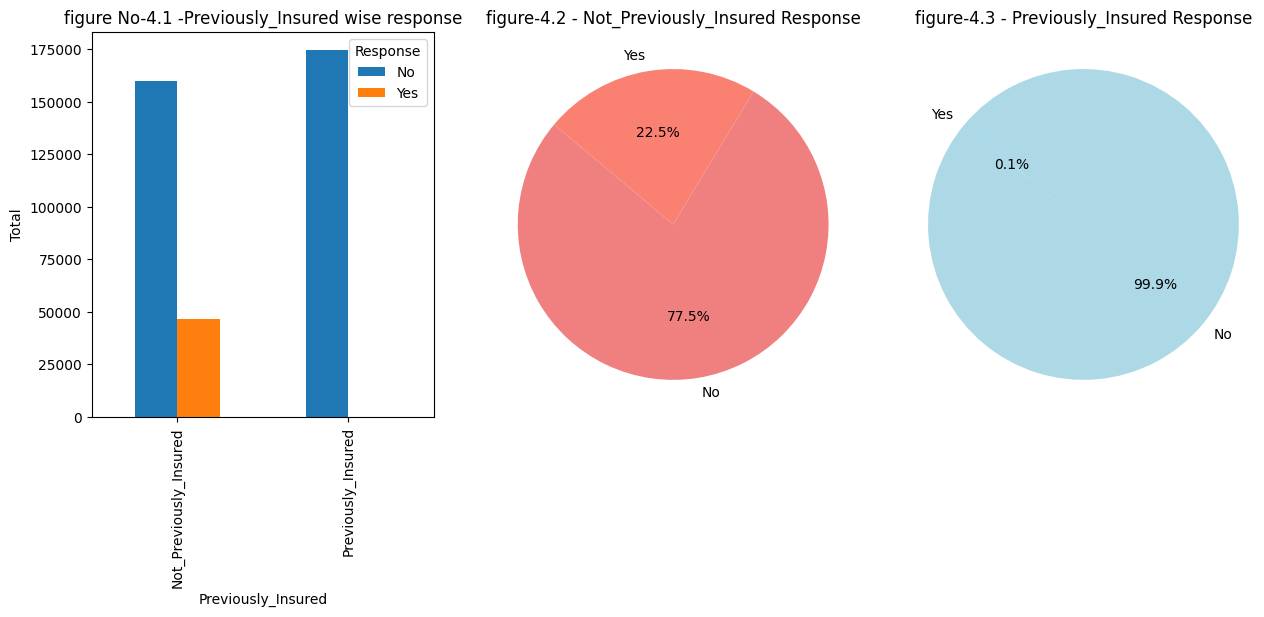

In [22]:
# Chart - 4 visualization code-Previously_Insured vs Response

fig,axs=plt.subplots(1,3,figsize=(15,5))
a.plot(kind='bar',ax=axs[0])
axs[0].set_title('figure No-4.1 -Previously_Insured wise response')
axs[0].set_xlabel('Previously_Insured')
axs[0].set_ylabel('Total')


# Data for pie chart plot to see in percent.
Not_Previously_Insured = [159929 , 46552]
categories_female = ['No', 'Yes']
Previously_Insured = [ 174470   , 158]
categories_male = ['No', 'Yes']

# Plotting the pie chart

axs[1].pie(Not_Previously_Insured, labels=categories_female, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'salmon', ])

axs[1].axis('equal')
axs[1].set_title('figure-4.2 - Not_Previously_Insured Response')

axs[2].pie(Previously_Insured, labels=categories_male, autopct='%1.1f%%', startangle=140, colors=[ 'lightblue', 'lightskyblue'])
axs[2].set_title('figure-4.3 - Previously_Insured Response')
axs[2].axis('equal')
plt.show()


##### 1. Why did you pick the specific chart?

* To visualize data easily.

##### 2. What is/are the insight(s) found from the chart?

* Here not_Previously_Insured  customers are giving positive response  than Previously insured vehicle.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Previously_Insured  has very low response 0.1% as compare to Not insured 22.5%

#### Chart - 5 -Vehicle_Damage vs Response

In [23]:
# Chart -5-numerical data -Vehicle_Damage vs Response

# Vehicle_Damage wise customers response
a=df.groupby('Vehicle_Damage')['Response'].value_counts().unstack()
a.rename(columns={0:'No',1:'Yes'},index={0:'No_Vehicle_Damage',1:'Vehicle_Damage'},inplace=True)
print(a)

Response               No    Yes
Vehicle_Damage                  
No_Vehicle_Damage  187714    982
Vehicle_Damage     146685  45728


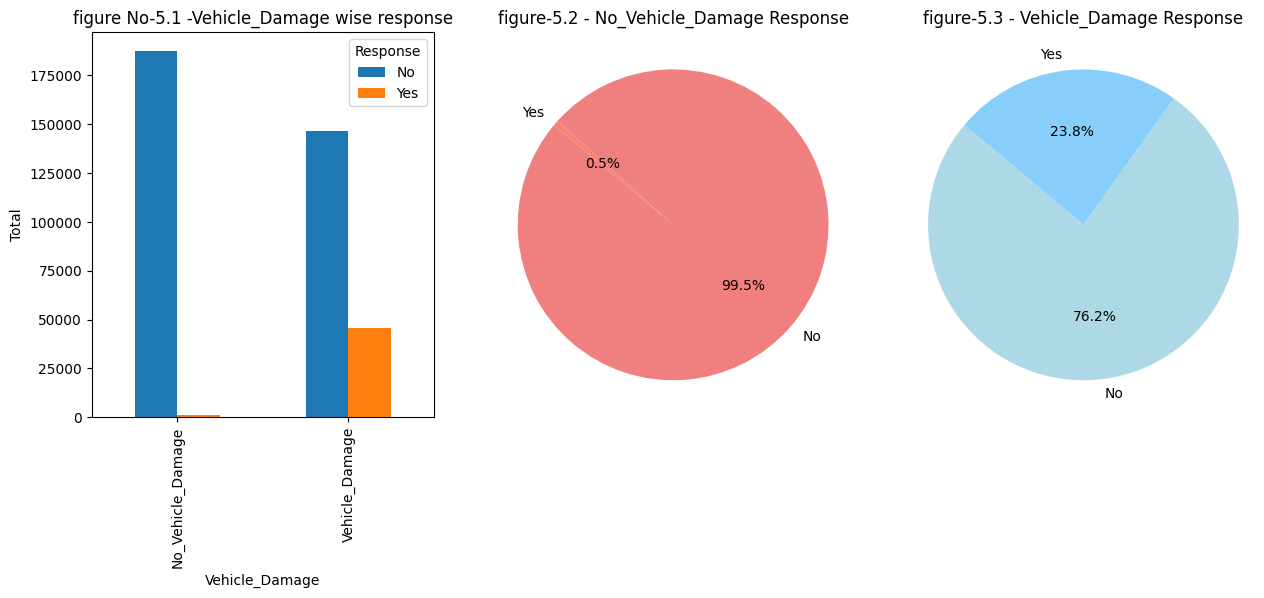

In [24]:
# Chart - 5 visualization -Vehicle_Damage vs Response

fig,axs=plt.subplots(1,3,figsize=(15,5))
a.plot(kind='bar',ax=axs[0])
axs[0].set_title('figure No-5.1 -Vehicle_Damage wise response')
axs[0].set_xlabel('Vehicle_Damage')
axs[0].set_ylabel('Total')


# Data for pie chart plot to see in percent.
No_Vehicle_Damage = [187714  ,  982]
categories_female = ['No', 'Yes']
Vehicle_Damage = [ 146685 , 45728]
categories_male = ['No', 'Yes']

# Plotting the pie chart

axs[1].pie(No_Vehicle_Damage, labels=categories_female, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'salmon', ])

axs[1].axis('equal')
axs[1].set_title('figure-5.2 - No_Vehicle_Damage Response')

axs[2].pie(Vehicle_Damage, labels=categories_male, autopct='%1.1f%%', startangle=140, colors=[ 'lightblue', 'lightskyblue'])
axs[2].set_title('figure-5.3 - Vehicle_Damage Response')
axs[2].axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

* Easy to understand.

##### 2. What is/are the insight(s) found from the chart?

* Here very vehicle not damage is giving response 0.5% as compare to damage 23.8%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Damage vehicle are more responding as compare to Not Damage vehicle.

#### Chart - 6

In [63]:
# Chart - 6 - Region_Code vs Response

#To check responed from customers
print('check responed from customers')
a=df.groupby('Region_Code')['Response'].value_counts().unstack()
a.rename(columns={0:'No',1:'Yes'},inplace=True)
print(a[:10])
print('--'*20)
# To check pertage of positive respond from region wise.
a['perc_positive_respond']=round((a['Yes']/(a['No']+a['Yes']))*100,2)

# Top 10 region have given positive respond
print('top 10 responding region')
b=a['perc_positive_respond'].sort_values(ascending=False).head(10)
print(b)
print('--'*20)
# top 10 not responding region
print('top 10 not responding region')
c=a['perc_positive_respond'].sort_values(ascending=True).head(10)
print(c)
print('--'*20)

check responed from customers
Response        No   Yes
Region_Code             
0.0           1847   174
1.0            899   109
2.0           3751   287
3.0           8070  1181
4.0           1516   285
5.0           1131   148
6.0           5841   439
7.0           2847   432
8.0          30620  3257
9.0           2848   253
10.0          4111   263
----------------------------------------
top 10 responding region
Region_Code
38.0    19.20
28.0    18.72
19.0    16.29
4.0     15.82
23.0    15.31
51.0    15.30
24.0    14.16
7.0     13.17
18.0    13.16
3.0     12.77
Name: perc_positive_respond, dtype: float64
----------------------------------------
top 10 not responding region
Region_Code
44.0    4.08
25.0    4.27
10.0    6.01
50.0    6.27
22.0    6.34
16.0    6.68
6.0     6.99
17.0    7.03
21.0    7.10
2.0     7.11
Name: perc_positive_respond, dtype: float64
----------------------------------------


<Figure size 500x500 with 0 Axes>

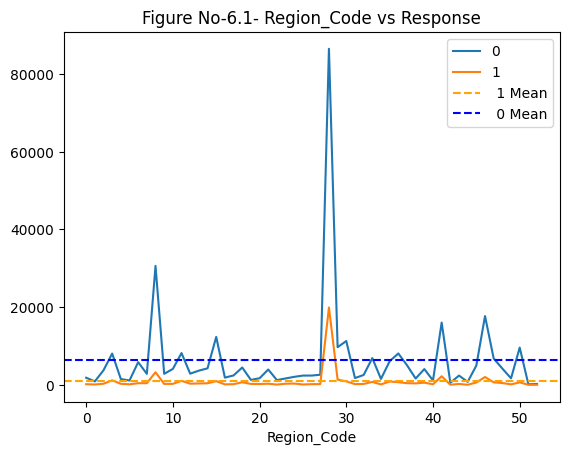

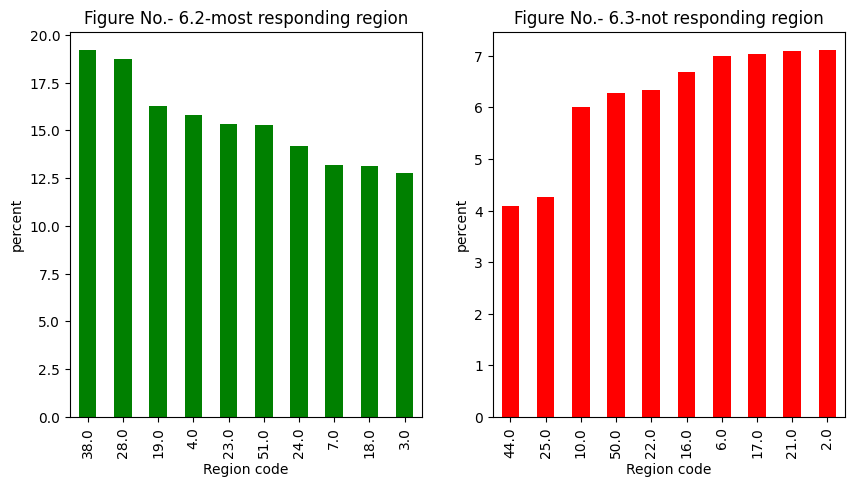

In [64]:
# Chart - 6 visualization code -Region_Code vs Response

ax=plt.figure(figsize=(5,5))
df.groupby('Region_Code')['Response'].value_counts().unstack().plot(kind='line')
plt.axhline((df.groupby('Region_Code')['Response'].value_counts().unstack())[1].mean(),linestyle='dashed',color='orange',label=' 1 Mean')
plt.axhline((df.groupby('Region_Code')['Response'].value_counts().unstack())[0].mean(),linestyle='dashed',color='blue',label=' 0 Mean')
plt.legend()
plt.title('Figure No-6.1- Region_Code vs Response')
plt.show()

# top 10 responding region
fig,axs=plt.subplots(1,2,figsize=(10,5))


a['perc_positive_respond'].sort_values(ascending=False).head(10).plot(kind='bar', ax=axs[0] ,color='green')
axs[0].set_title('Figure No.- 6.2-most responding region')
axs[0].set_xlabel('Region code')
axs[0].set_ylabel('percent')

# top 10 not responding region
a['perc_positive_respond'].sort_values(ascending=True).head(10).plot(kind='bar' , ax=axs[1],color='red')
axs[1].set_title('Figure No.- 6.3-not responding region')
axs[1].set_xlabel('Region code')
axs[1].set_ylabel('percent')
plt.show()



##### 1. Why did you pick the specific chart?

* To visualize easily.

##### 2. What is/are the insight(s) found from the chart?

* Region 38 has given most respond positively appro. 19% and region 44 has lowest responsed appro. 4 %.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Need to do advertisement to increase subscription.

#### Chart - 7

In [107]:
# Chart - 7 Numerical data Response vs Vehicle_Age
print('No of vehicle in diff category')
a=df['Vehicle_Age'].value_counts()
print(a)
print('--'*20)

# To check Response by age of vehicle and percentage of positive response too
b=df.groupby('Vehicle_Age')['Response'].value_counts().unstack().rename(columns={0:'No',1:'Yes'})
b['percentage']=(b['Yes']/a)*100
b

No of vehicle in diff category
1    200316
0    164786
2     16007
Name: Vehicle_Age, dtype: int64
----------------------------------------


Response,No,Yes,percentage
Vehicle_Age,,,
0,157584,7202,4.370517
1,165510,34806,17.375547
2,11305,4702,29.374649


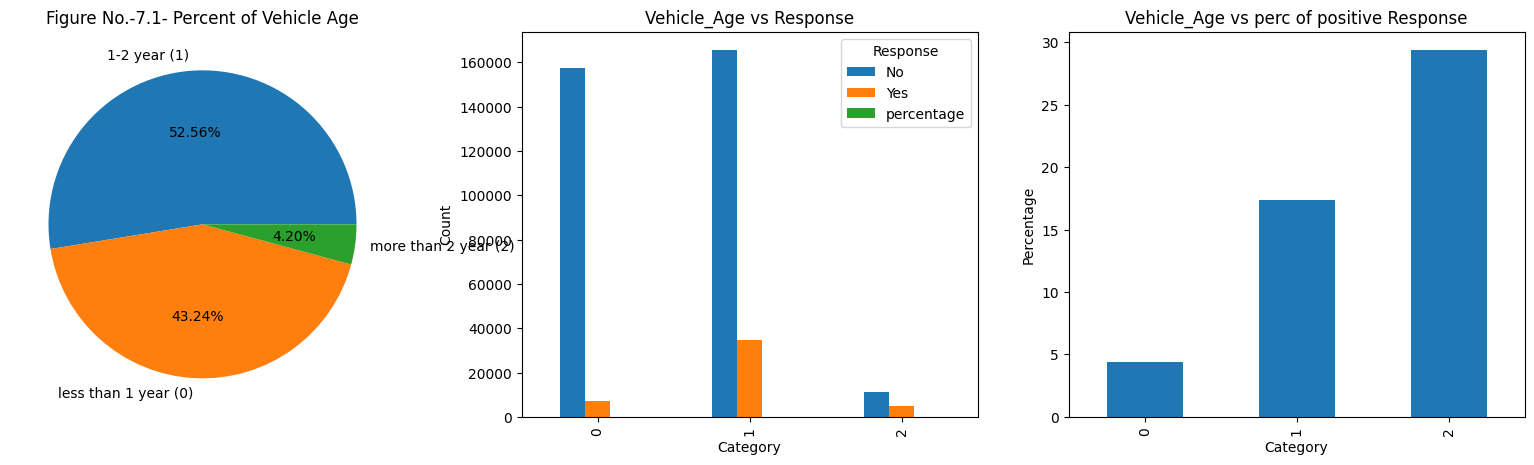

In [153]:
# Chart - 7 visualization code - Response vs Vehicle_Age
#Percent of vehicle Age
fig,axs=plt.subplots(1,3,figsize=(20,5))
labels=['1-2 year (1)','less than 1 year (0)','more than 2 year (2)']
axs[0].pie(a,labels=labels,autopct='%.2f%%')
axs[0].set_title('Figure No.-7.1- Percent of Vehicle Age')


#Check Response by Vehicle Age category and its percent
b.plot(kind='bar',ax=axs[1])
axs[1].set_ylabel('Count')
axs[1].set_xlabel('Category')
axs[1].set_title('Vehicle_Age vs Response')


b['percentage'].plot(kind='bar',ax=axs[2])

axs[2].set_ylabel('Percentage')
axs[2].set_xlabel('Category')
axs[2].set_title('Vehicle_Age vs perc of positive Response')
plt.show()


##### 1. Why did you pick the specific chart?

* To better understand what customer want.

##### 2. What is/are the insight(s) found from the chart?

* Vehicle age more than 2 year has less Register but Has shown More Positive responsed appr. 29 %.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes

In [25]:
['id',
       , 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response']

SyntaxError: ignored

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***